# Kaggle Home price prediction

#### In this version, we find the most correlated variables with 'SalePrice' and them in our Sklearn models

In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Stats helpers
from scipy.stats import norm
from scipy import stats

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

/home/maviator/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load train and test data

In [2]:
# get home price train & test csv files as a DataFrame
train = pd.read_csv("../Data/train.csv")
test    = pd.read_csv("../Data/test.csv")
full = train.append(test, ignore_index=True)
print (train.shape, test.shape, full.shape)

((1460, 81), (1459, 80), (2919, 81))


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## 'SalePrice' correlation matrix

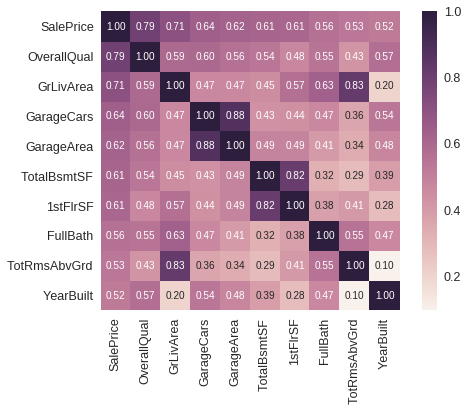

In [6]:
#correlation matrix
corrmat = train.corr()

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From this correlation map we can make the following interpretations:
- 'GarageCars' and 'GarageArea' are highly correlated which makes sense. Therefore choosing only one of them is sufficient. Since 'GarageCars' has higher correlation with 'SalePrice', we eliminate 'GarageArea'
- '1stFlrSF' and 'TotalBsmtSF' are highly correlated. Therefore choosing only one of them is reasonable. We keep 'TotalBsmtSF' since it's more correlated with 'SalePrice'
- 'TotRmsAbvGrd' and 'GrLivArea' are highly correlated and therefore we will keep only 'GrLivArea'.
We keep the following variables: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'

In [7]:
col = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt'
      ]

In [8]:
train_selected = train[col]
test_selected = test[col]
print train_selected.shape, test_selected.shape

(1460, 6) (1459, 6)


## Missing Data

In [9]:
#missing data in train_selected data
total = train_selected.isnull().sum().sort_values(ascending=False)
percent = (train_selected.isnull().sum()/train_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
YearBuilt,0,0.0
FullBath,0,0.0
TotalBsmtSF,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0


In [10]:
#missing data in test_selected data
total = test_selected.isnull().sum().sort_values(ascending=False)
percent = (test_selected.isnull().sum()/test_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
YearBuilt,0,0.000000
FullBath,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000


Only 1 entry has missing values for the 'TotalBsmtSF' and 'GarageCars'. We will fill them with -1

In [11]:
test_selected.TotalBsmtSF.fillna(-1, inplace=True);
test_selected.GarageCars.fillna(-1, inplace=True);

/home/maviator/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Make sure Test data has no more missing data

In [12]:
#missing data in test data
total = test_selected.isnull().sum().sort_values(ascending=False)
percent = (test_selected.isnull().sum()/test_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(33)

,Total,Percent
YearBuilt,0,0.0
FullBath,0,0.0
TotalBsmtSF,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0


## Train, validation split

In [13]:
train_selected_y = train.SalePrice

In [14]:
train_x, valid_x, train_y, valid_y = train_test_split(train_selected, 
                                                      train_selected_y,
                                                     train_size=0.7)
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape, test_selected.shape

((1021, 6), (439, 6), (1021,), (439,), (1459, 6))

## Modelling

In [15]:
model = RandomForestClassifier(n_estimators=100)
#model = SVC()
#model = GradientBoostingClassifier()
#model = KNeighborsClassifier(n_neighbors = 3)
#model = GaussianNB()
#model = LogisticRegression()

In [16]:
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
# Score the model
print (model.score(train_x, train_y), model.score(valid_x, valid_y))

(0.97943192948090108, 0.0091116173120728925)


## Submission

In [18]:
test_y = model.predict(test_selected)
test_id = test.Id
test_submit = pd.DataFrame({'Id': test_id, 'SalePrice': test_y})
test_submit.shape
test_submit.head()
test_submit.to_csv('house_price_pred_corr_RandomForest.csv',
                   index=False)

## Remarks

Using the correlation method, we were able to go from 36 variables to only 6. Performance wise the score dropped from 0.22628 to 0.22856 using a Random Forest model. I believe we can further improve it by analysing the categorical variables.

## Credits

Many of the analysis and core snippets are from this very thorough 